In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import glob
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import importlib
import sys
importlib.reload(sys)
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
plt.rcParams['font.sans-serif'] = 'SimHei'  #显示中文
plt.rcParams['axes.unicode_minus'] = False  #显示负号
plt.rcParams['figure.dpi'] = 200  # 图像分辨率
plt.rcParams['text.color'] = 'black'  # 文字颜色
plt.style.use('ggplot')
print(plt.style.available)  # 可选的plt绘图风格
'''
['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']
'''

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


"\n['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']\n"

In [272]:
dataset = pd.read_csv('../Data/NOAA/All Station/Burlington Station.csv')
# dataset.drop('TIMESTAMP_START',axis=1,inplace=True) #axis=1 表示按列删除，inplace=True 表示在原 DataFrame 上进行修改

In [273]:
dataset.head()

,Date,Time (GMT),Wind Speed (m/s),Wind Dir (deg),Wind Gust (m/s),Air Temp (°C),Baro (mb),Water Level(m)
0,2022/1/1,0:00,0.9,192,1.8,10.3,1014.2,2.411
1,2022/1/1,1:00,1.0,223,1.6,10.3,1014.3,2.436
2,2022/1/1,2:00,1.4,169,2.0,10.2,1013.4,2.104
3,2022/1/1,3:00,1.3,185,1.8,9.7,1013.2,1.677
4,2022/1/1,4:00,1.7,186,2.4,9.8,1013.0,1.255


In [274]:
dataset.columns

Index(['Date', 'Time (GMT)', 'Wind Speed (m/s)', 'Wind Dir (deg)',
       'Wind Gust (m/s)', 'Air Temp (°C)', 'Baro (mb)', 'Water Level(m)'],
      dtype='object')

In [275]:
dataset = dataset[['Wind Speed (m/s)', 'Wind Dir (deg)','Wind Gust (m/s)', 'Water Level(m)']]

In [276]:
dataset.head()

,Wind Speed (m/s),Wind Dir (deg),Wind Gust (m/s),Water Level(m)
0,0.9,192,1.8,2.411
1,1.0,223,1.6,2.436
2,1.4,169,2.0,2.104
3,1.3,185,1.8,1.677
4,1.7,186,2.4,1.255


# 数据归一化

In [277]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [278]:
dataset[0:20]

array([[0.06870229, 0.53333333, 0.08450704, 0.77614253],
       [0.07633588, 0.61944444, 0.07511737, 0.78259747],
       [0.10687023, 0.46944444, 0.09389671, 0.69687581],
       [0.09923664, 0.51388889, 0.08450704, 0.58662536],
       [0.12977099, 0.51666667, 0.11267606, 0.47766589],
       [0.19847328, 0.51666667, 0.17840376, 0.38109992],
       [0.09923664, 0.38611111, 0.08920188, 0.29666925],
       [0.09160305, 0.36111111, 0.11737089, 0.22411567],
       [0.12977099, 0.36666667, 0.09859155, 0.24296411],
       [0.09160305, 0.35833333, 0.08920188, 0.41260005],
       [0.05343511, 0.31666667, 0.05164319, 0.58197779],
       [0.07633588, 0.43055556, 0.07511737, 0.73586367],
       [0.07633588, 0.21111111, 0.06103286, 0.83346243],
       [0.05343511, 0.48888889, 0.05633803, 0.87477408],
       [0.01526718, 0.03611111, 0.15492958, 0.836819  ],
       [0.08396947, 0.60555556, 0.07042254, 0.73638007],
       [0.09160305, 0.53888889, 0.10798122, 0.62251485],
       [0.07633588, 0.80555556,

# 转换数据格式

In [279]:
def splitData(var,per_test):
    num_test=int(len(var)*per_test)
    train_size=int(len(var)-num_test)
    train_data=var[0:train_size]
    test_data=var[train_size:train_size+num_test]
    return train_data,test_data

## 数据集划分

In [280]:
training,testing = splitData(dataset,0.2)

In [281]:
training

array([[0.06870229, 0.53333333, 0.08450704, 0.77614253],
       [0.07633588, 0.61944444, 0.07511737, 0.78259747],
       [0.10687023, 0.46944444, 0.09389671, 0.69687581],
       ...,
       [0.49618321, 0.66666667, 0.41314554, 0.28505035],
       [0.58778626, 0.66944444, 0.48356808, 0.22773044],
       [0.32824427, 0.64444444, 0.342723  , 0.28892332]])

In [282]:
testing

array([[0.48854962, 0.54722222, 0.42253521, 0.41724761],
       [0.34351145, 0.54444444, 0.32394366, 0.56777692],
       [0.26717557, 0.66388889, 0.24882629, 0.68448231],
       ...,
       [0.22137405, 0.81944444, 0.17840376, 0.6052156 ],
       [0.14503817, 0.69166667, 0.09859155, 0.69945778],
       [0.07633588, 0.77222222, 0.07981221, 0.73483088]])

In [284]:
'''
dataset: 数据集
n_past: 所使用过去的样本数量（使用过去的多少个样本来推算下一天）
'''
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i,0:dataset.shape[1]])
            dataY.append(dataset[i,3])
            # print(dataset[i,5])
    return np.array(dataX),np.array(dataY)

In [285]:
### 创建用于训练的时间序列数据

In [286]:
# n_past = 1
# trainX,trainY = createXY(training,n_past)

In [287]:
n_past = 1
trainX,trainY = createXY(training,n_past)
testX,testY = createXY(testing,n_past)

### 打印训练集和测试集的形状

In [288]:
print('trainX Shape---',trainX.shape)
print('trainY Shape---',trainY.shape)

trainX Shape--- (7021, 1, 4)
trainY Shape--- (7021,)


In [289]:
print('testX Shape---',testX.shape)
print('testY Shape---',testY.shape)

testX Shape--- (1754, 1, 4)
testY Shape--- (1754,)


In [290]:
trainX.shape[1]

1

In [291]:
# trainX = trainX.reshape(21007, 30)#

#### 重塑为RF可以识别的形状

In [292]:
trainX=np.reshape(trainX,(trainX.shape[0],trainX.shape[1]*trainX.shape[2]))

trainX.shape

(7021, 4)

In [293]:
testX=np.reshape(testX,(testX.shape[0],testX.shape[1]*testX.shape[2]))

testX.shape

(1754, 4)

## 随机森拉

In [294]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100,oob_score=True,n_jobs=-1,random_state=50,max_features=1.0,min_samples_leaf=10)

In [295]:
model.fit(trainX,trainY)

RandomForestRegressor(min_samples_leaf=10, n_jobs=-1, oob_score=True,
                      random_state=50)

In [296]:
pre = model.predict(testX)

In [297]:
pre

array([0.41774745, 0.54735992, 0.6642351 , ..., 0.45701229, 0.6090141 ,
       0.65596215])

In [298]:
print(pre)
pre = np.array(pre).reshape(-1,1)

[0.41774745 0.54735992 0.6642351  ... 0.45701229 0.6090141  0.65596215]


In [299]:
pre[-300:]

array([[0.71574242],
       [0.73605402],
       [0.6521542 ],
       [0.53303441],
       [0.49301606],
       [0.3559801 ],
       [0.27221941],
       [0.22351914],
       [0.23881498],
       [0.25286347],
       [0.43839729],
       [0.53809392],
       [0.68051056],
       [0.7384646 ],
       [0.64346919],
       [0.57583611],
       [0.51619195],
       [0.38156271],
       [0.29200125],
       [0.25051018],
       [0.23387268],
       [0.28436806],
       [0.42238622],
       [0.6127827 ],
       [0.73385445],
       [0.78507731],
       [0.78655213],
       [0.72600072],
       [0.65965551],
       [0.48976954],
       [0.43558365],
       [0.35197702],
       [0.27316101],
       [0.2491892 ],
       [0.34027073],
       [0.50947439],
       [0.60923759],
       [0.69891312],
       [0.73715597],
       [0.67682919],
       [0.61904852],
       [0.50098696],
       [0.38311245],
       [0.3529787 ],
       [0.24826554],
       [0.26708945],
       [0.39357675],
       [0.527

In [300]:
testY[-300:]

array([0.75703589, 0.68086754, 0.57784663, 0.46914537, 0.37128841,
       0.28375936, 0.20604183, 0.15259489, 0.26878389, 0.40098115,
       0.5695843 , 0.68009295, 0.73508908, 0.68732249, 0.58714175,
       0.47430932, 0.3718048 , 0.28246837, 0.20578363, 0.15930803,
       0.30777175, 0.44719855, 0.63000258, 0.74774077, 0.81745417,
       0.82184353, 0.73792925, 0.63155177, 0.5233669 , 0.42550994,
       0.33849729, 0.25897237, 0.20268526, 0.32042344, 0.45623548,
       0.62664601, 0.73173251, 0.77123677, 0.7095275 , 0.60599019,
       0.49496514, 0.39349342, 0.30493158, 0.22618125, 0.1742835 ,
       0.32791118, 0.46837077, 0.64988381, 0.76400723, 0.82933127,
       0.82907307, 0.74076943, 0.63439194, 0.52620707, 0.42731733,
       0.34082107, 0.26232894, 0.20681642, 0.35011619, 0.488252  ,
       0.66847405, 0.77201136, 0.82287632, 0.79705655, 0.71133488,
       0.62019107, 0.53162923, 0.4536535 , 0.38987865, 0.37438678,
       0.55615802, 0.69300284, 0.86134779, 0.95249161, 1.     

In [301]:
prediction_copies_array = np.repeat(pre,trainX.shape[1],axis = -1) #将一个数组prediction在最后一个轴上（即axis=-1）进行复制，重复8次，并将

In [302]:
prediction_copies_array

array([[0.41774745, 0.41774745, 0.41774745, 0.41774745],
       [0.54735992, 0.54735992, 0.54735992, 0.54735992],
       [0.6642351 , 0.6642351 , 0.6642351 , 0.6642351 ],
       ...,
       [0.45701229, 0.45701229, 0.45701229, 0.45701229],
       [0.6090141 , 0.6090141 , 0.6090141 , 0.6090141 ],
       [0.65596215, 0.65596215, 0.65596215, 0.65596215]])

In [304]:
pre = scaler.inverse_transform(np.reshape(prediction_copies_array,(len(pre),trainX.shape[1])))[:,3] #进行逆变换但是，只需要最后一列

In [305]:
pre[-300:]

array([2.17707041, 2.25573723, 1.93079321, 1.46944226, 1.31445118,
       0.78371092, 0.45930578, 0.27068964, 0.3299304 , 0.38434022,
       1.1029127 , 1.48903773, 2.04061739, 2.26507339, 1.89715619,
       1.63521324, 1.40421143, 0.88279238, 0.53592083, 0.37522593,
       0.3107889 , 0.50635748, 1.04090182, 1.7783074 , 2.24721829,
       2.44560444, 2.45131639, 2.21680079, 1.95984578, 1.30187741,
       1.09201546, 0.76820699, 0.46295258, 0.37010976, 0.72286853,
       1.37819429, 1.76457718, 2.11189051, 2.26000508, 2.02635947,
       1.80257492, 1.34532251, 0.88879453, 0.7720865 , 0.36653245,
       0.43943743, 0.92932275, 1.44608974, 1.92370122, 2.24484683,
       2.45213904, 2.48327337, 2.13187417, 1.79611281, 1.3154293 ,
       1.17230823, 0.73318757, 0.5441532 , 0.41074763, 0.72713773,
       1.43021418, 1.96194797, 2.38988989, 2.44374135, 2.38395639,
       2.07056253, 1.64412578, 1.44919357, 1.17986543, 0.97679535,
       0.88088815, 1.38122032, 1.98588216, 2.57196402, 2.74202

## 显示重要特征

In [306]:
# # plot_importance(model)
# # plt.show()
# print(pre[-300:])


In [307]:
testY[-300:]
test_data = np.array(testY[-300:]).reshape(-1,1)
test_data

array([[0.75703589],
       [0.68086754],
       [0.57784663],
       [0.46914537],
       [0.37128841],
       [0.28375936],
       [0.20604183],
       [0.15259489],
       [0.26878389],
       [0.40098115],
       [0.5695843 ],
       [0.68009295],
       [0.73508908],
       [0.68732249],
       [0.58714175],
       [0.47430932],
       [0.3718048 ],
       [0.28246837],
       [0.20578363],
       [0.15930803],
       [0.30777175],
       [0.44719855],
       [0.63000258],
       [0.74774077],
       [0.81745417],
       [0.82184353],
       [0.73792925],
       [0.63155177],
       [0.5233669 ],
       [0.42550994],
       [0.33849729],
       [0.25897237],
       [0.20268526],
       [0.32042344],
       [0.45623548],
       [0.62664601],
       [0.73173251],
       [0.77123677],
       [0.7095275 ],
       [0.60599019],
       [0.49496514],
       [0.39349342],
       [0.30493158],
       [0.22618125],
       [0.1742835 ],
       [0.32791118],
       [0.46837077],
       [0.649

In [308]:
prediction_copies_test_data = np.repeat(test_data,trainX.shape[1],axis = -1) #将一个数组prediction在最后一个轴上（即axis=-1）进行复制，重复8次，并将

In [309]:
prediction_copies_test_data

array([[0.75703589, 0.75703589, 0.75703589, 0.75703589],
       [0.68086754, 0.68086754, 0.68086754, 0.68086754],
       [0.57784663, 0.57784663, 0.57784663, 0.57784663],
       ...,
       [0.6052156 , 0.6052156 , 0.6052156 , 0.6052156 ],
       [0.69945778, 0.69945778, 0.69945778, 0.69945778],
       [0.73483088, 0.73483088, 0.73483088, 0.73483088]])

In [310]:
test_data = scaler.inverse_transform(np.reshape(prediction_copies_test_data,(len(test_data),trainX.shape[1])))[:,3] #进行逆变换但是，只需要最后一列
test_data

array([ 2.337e+00,  2.042e+00,  1.643e+00,  1.222e+00,  8.430e-01,
        5.040e-01,  2.030e-01, -4.000e-03,  4.460e-01,  9.580e-01,
        1.611e+00,  2.039e+00,  2.252e+00,  2.067e+00,  1.679e+00,
        1.242e+00,  8.450e-01,  4.990e-01,  2.020e-01,  2.200e-02,
        5.970e-01,  1.137e+00,  1.845e+00,  2.301e+00,  2.571e+00,
        2.588e+00,  2.263e+00,  1.851e+00,  1.432e+00,  1.053e+00,
        7.160e-01,  4.080e-01,  1.900e-01,  6.460e-01,  1.172e+00,
        1.832e+00,  2.239e+00,  2.392e+00,  2.153e+00,  1.752e+00,
        1.322e+00,  9.290e-01,  5.860e-01,  2.810e-01,  8.000e-02,
        6.750e-01,  1.219e+00,  1.922e+00,  2.364e+00,  2.617e+00,
        2.616e+00,  2.274e+00,  1.862e+00,  1.443e+00,  1.060e+00,
        7.250e-01,  4.210e-01,  2.060e-01,  7.610e-01,  1.296e+00,
        1.994e+00,  2.395e+00,  2.592e+00,  2.492e+00,  2.160e+00,
        1.807e+00,  1.464e+00,  1.162e+00,  9.150e-01,  8.550e-01,
        1.559e+00,  2.089e+00,  2.741e+00,  3.094e+00,  3.278e

In [312]:
from sklearn.metrics import r2_score as r2
y=np.array(test_data)
y_pred = pre[-300:]
MSE = mean_squared_error(y, y_pred)
RMSE = math.sqrt(MSE)
# MAE=mean_absolute_error(y, pre)
# MAPE = metrics.mean_absolute_percentage_error(y, pre)
MAE = np.mean(np.abs(y-y_pred))
MAPE = np.mean(np.abs((y - y_pred) / y))
print("rmse :",RMSE)
print("mae :", MAE)
print("mape :", MAPE)
print('R² :',r2(y,y_pred))

rmse : 0.39354218961669163
mae : 0.354542581264629
mape : 1.4281519724943976
R² : 0.76140251892525


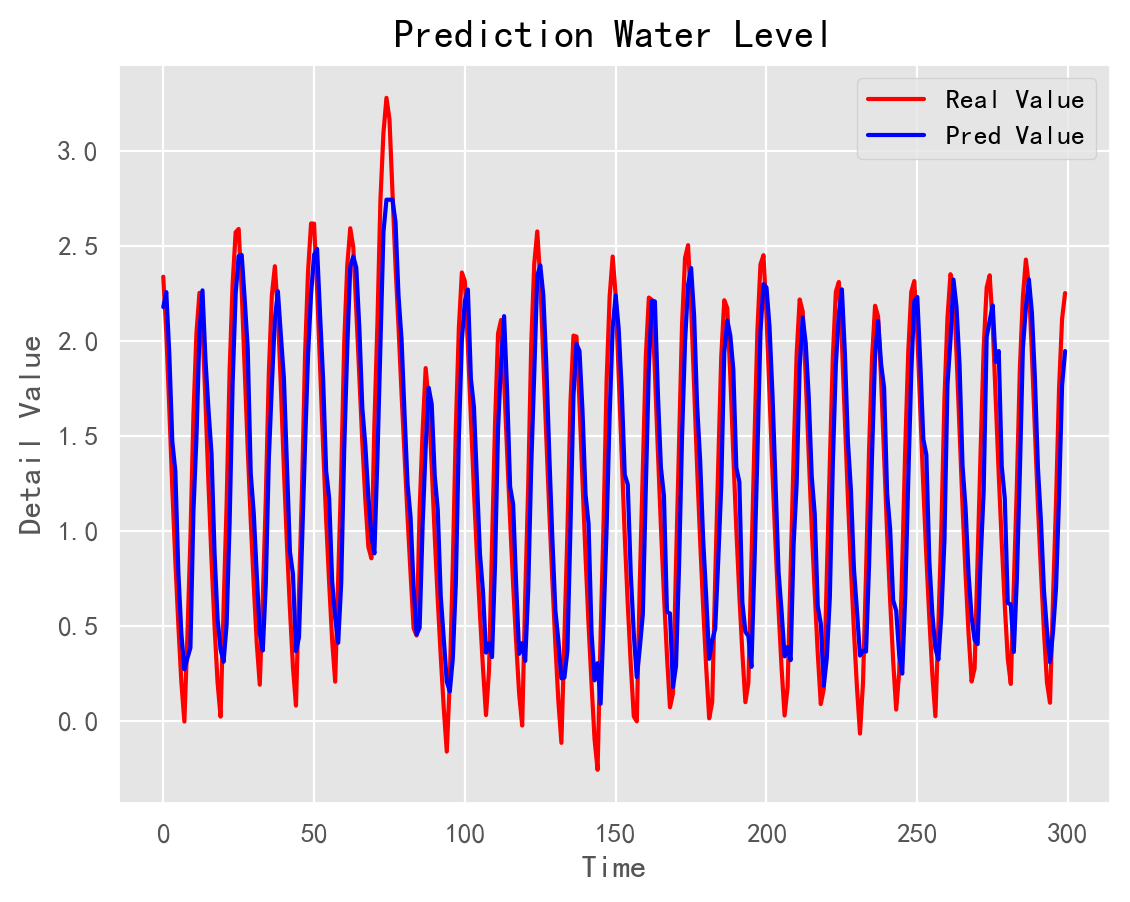

In [314]:
plt.plot(y,color = 'red',label = 'Real Value')
plt.plot(y_pred,color = 'blue',label = 'Pred Value')
plt.title('Prediction Water Level')
plt.xlabel('Time')
plt.ylabel('Detail Value')
plt.legend()
plt.show()

In [163]:
# testY.shape

(1754,)

In [218]:
# prediction_copies_array = np.repeat(pre,trainX.shape[1],axis = -1) #将一个数组prediction在最后一个轴上（即axis=-1）进行复制，重复8次，并将

In [220]:
# prediction_copies_array[-300:]

array([[0.72286966, 0.72286966, 0.72286966, 0.72286966, 0.72286966,
        0.72286966],
       [0.72213277, 0.72213277, 0.72213277, 0.72213277, 0.72213277,
        0.72213277],
       [0.6474262 , 0.6474262 , 0.6474262 , 0.6474262 , 0.6474262 ,
        0.6474262 ],
       ...,
       [0.44558812, 0.44558812, 0.44558812, 0.44558812, 0.44558812,
        0.44558812],
       [0.61194455, 0.61194455, 0.61194455, 0.61194455, 0.61194455,
        0.61194455],
       [0.65432874, 0.65432874, 0.65432874, 0.65432874, 0.65432874,
        0.65432874]])

In [157]:
# datasets = pd.read_csv('../Data/NOAA/All Station/Burlington Station.csv')
# y = datasets['Water Level(m)'][-300:]

In [158]:
# y

8477    2.337
8478    2.042
8479    1.643
8480    1.222
8481    0.843
        ...  
8772    0.644
8773    1.150
8774    1.749
8775    2.114
8776    2.251
Name: Water Level(m), Length: 300, dtype: float64

In [159]:
# y_pred = pre[-300:]

In [160]:
# y_pred

array([ 0.37388845,  0.48159298,  0.43367717,  0.38972025,  0.05066418,
        0.05468672,  0.10385616,  0.43510243,  0.1179165 ,  0.33556625,
        0.42903395, -0.14985872,  0.23788483, -0.09835728, -0.16472859,
        0.12481993,  0.1163776 ,  0.15501437, -0.09672788, -0.09352961,
        0.13336775,  0.24474784,  0.10143738, -0.12067712, -0.05027239,
        0.18517975, -0.1068115 , -0.42126743, -0.50472087, -0.28924548,
       -0.16269841, -0.23802955,  0.2590644 , -0.09484025, -0.29939302,
       -0.02192067, -0.2563317 , -0.12375588, -0.33384814, -0.22532085,
       -0.19582519, -0.25734346,  0.1695909 , -0.35521422, -0.43793196,
       -0.53146407, -0.5201191 , -0.35782959, -0.56125233, -0.66745193,
       -0.57468013, -0.69025912, -0.57005108, -0.73896084, -0.78084992,
       -0.68705532, -0.56726292, -0.64865381, -0.58911218, -0.64931501,
       -0.58897507, -0.53199808, -0.50081832, -0.61136229, -0.57274433,
       -0.58022591, -0.44506834, -0.29482668,  0.00622563,  0.09

In [161]:
# from sklearn.metrics import r2_score as r2
# y=np.array(y)
# MSE = mean_squared_error(y, y_pred)
# RMSE = math.sqrt(MSE)
# # MAE=mean_absolute_error(y, pre)
# # MAPE = metrics.mean_absolute_percentage_error(y, pre)
# MAE = np.mean(np.abs(y-y_pred))
# MAPE = np.mean(np.abs((y - y_pred) / y))
# print("rmse :",RMSE)
# print("mae :", MAE)
# print("mape :", MAPE)
# print('R² :',r2(y,y_pred))

rmse : 1.4008577150402475
mae : 1.1424858509871647
mape : 2.0017004196153705
R² : -2.023230857505941


In [56]:
# y_true = pd.DataFrame(y)
# y_true.to_csv('../LSTM/LSTM_Result_Collection_SW_TA_LW_VPD_PA_WS_RH/PredictionResult/SW_TA_LW_VPD_PA_WS_RH/'+'SW_RFYTrue'+'.csv',index=False)
# y_pre = pd.DataFrame(y_pred)
# y_pre.to_csv('../LSTM/LSTM_Result_Collection_SW_TA_LW_VPD_PA_WS_RH/PredictionResult/SW_TA_LW_VPD_PA_WS_RH/'+'SW_RFYTPre'+'.csv',index=False)

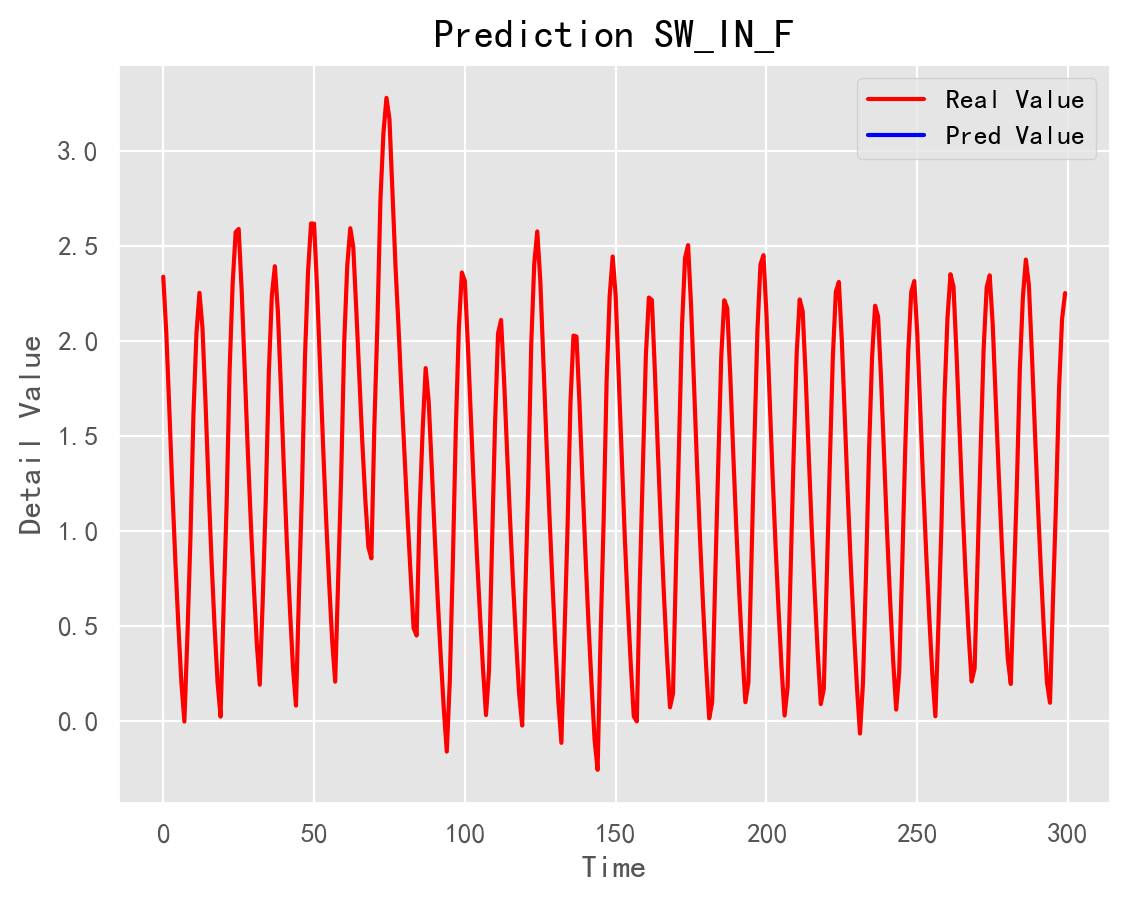

In [57]:
plt.plot(y[0:300],color = 'red',label = 'Real Value')
plt.plot(pre[-2392:-2092],color = 'blue',label = 'Pred Value')
plt.title('Prediction SW_IN_F')
plt.xlabel('Time')
plt.ylabel('Detail Value')
plt.legend()
plt.show()